In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')
''''
import matplotlib
matplotlib.rc('font', family='AppleGothic')
matplotlib.rc('axes', unicode_minus=False)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# 그래프 틀 변경
plt.rcParams['axes.unicode_minus'] = False
sns.set(font_scale = 1)  
plt.style.use(['fivethirtyeight'])
pd.set_option('display.max_columns', None) '''

"'\nimport matplotlib\nmatplotlib.rc('font', family='AppleGothic')\nmatplotlib.rc('axes', unicode_minus=False)\n\nfrom IPython.display import set_matplotlib_formats\nset_matplotlib_formats('retina')\n\n# 그래프 틀 변경\nplt.rcParams['axes.unicode_minus'] = False\nsns.set(font_scale = 1)  \nplt.style.use(['fivethirtyeight'])\npd.set_option('display.max_columns', None) "

In [2]:
clean_data= pd.read_csv('clean_data.csv',  index_col = 0)
df = clean_data.copy()
df.head()

,size,price,date,product,release_date,color,release_price
0,235,250000,2021-09-11,(GS) Nike Dunk Low Championship Grey,2021-09-02,WOLFGREY/DARKOBSIDIAN-TOTALORANGE,100800
1,235,250000,2021-09-12,(GS) Nike Dunk Low Championship Grey,2021-09-02,WOLFGREY/DARKOBSIDIAN-TOTALORANGE,100800
2,240,280000,2021-09-18,(GS) Nike Dunk Low Championship Grey,2021-09-02,WOLFGREY/DARKOBSIDIAN-TOTALORANGE,100800
3,235,260000,2021-09-19,(GS) Nike Dunk Low Championship Grey,2021-09-02,WOLFGREY/DARKOBSIDIAN-TOTALORANGE,100800
4,240,240000,2021-09-19,(GS) Nike Dunk Low Championship Grey,2021-09-02,WOLFGREY/DARKOBSIDIAN-TOTALORANGE,100800


In [3]:
df.shape

(145554, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145554 entries, 0 to 1482
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   size           145554 non-null  int64 
 1   price          145554 non-null  int64 
 2   date           145554 non-null  object
 3   product        145554 non-null  object
 4   release_date   145554 non-null  object
 5   color          145554 non-null  object
 6   release_price  145554 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 8.9+ MB


In [5]:
df.isnull().any()

size             False
price            False
date             False
product          False
release_date     False
color            False
release_price    False
dtype: bool

In [6]:
df['Bought for Less Than release'] = df['price'] < df['release_price']
df.head(3)

,size,price,date,product,release_date,color,release_price,Bought for Less Than release
0,235,250000,2021-09-11,(GS) Nike Dunk Low Championship Grey,2021-09-02,WOLFGREY/DARKOBSIDIAN-TOTALORANGE,100800,False
1,235,250000,2021-09-12,(GS) Nike Dunk Low Championship Grey,2021-09-02,WOLFGREY/DARKOBSIDIAN-TOTALORANGE,100800,False
2,240,280000,2021-09-18,(GS) Nike Dunk Low Championship Grey,2021-09-02,WOLFGREY/DARKOBSIDIAN-TOTALORANGE,100800,False


In [7]:
df['Bought for More Than release'] = df['price'] > df['release_price']
df.head(3)

,size,price,date,product,release_date,color,release_price,Bought for Less Than release,Bought for More Than release
0,235,250000,2021-09-11,(GS) Nike Dunk Low Championship Grey,2021-09-02,WOLFGREY/DARKOBSIDIAN-TOTALORANGE,100800,False,True
1,235,250000,2021-09-12,(GS) Nike Dunk Low Championship Grey,2021-09-02,WOLFGREY/DARKOBSIDIAN-TOTALORANGE,100800,False,True
2,240,280000,2021-09-18,(GS) Nike Dunk Low Championship Grey,2021-09-02,WOLFGREY/DARKOBSIDIAN-TOTALORANGE,100800,False,True


In [8]:
# 남성 , 여성(GS,W) , 아동(PS, TD) 구분

In [9]:
df_men = df[(~df['product'].str.contains('GS')) & (~df['product'].str.contains('PS')) & (~df['product'].str.contains('TD'))&(~df['product'].str.contains('(W)'))]

In [10]:
# 남성
df_men.head(10)

,size,price,date,product,release_date,color,release_price,Bought for Less Than release,Bought for More Than release
12929,270,200000,2021-12-29,Nike Dunk Low Premium BHM SB 2015,2015-01-18,BLACK/WHITE-BLACK,160200,False,True
12930,280,230000,2021-02-06,Nike Dunk Low Retro Hyper Cobalt,2021-02-11,BLACK/HYPERCOBALT-WHITE,119000,False,True
12931,260,250000,2021-02-09,Nike Dunk Low Retro Hyper Cobalt,2021-02-11,BLACK/HYPERCOBALT-WHITE,119000,False,True
12932,250,290000,2021-02-09,Nike Dunk Low Retro Hyper Cobalt,2021-02-11,BLACK/HYPERCOBALT-WHITE,119000,False,True
12933,255,260000,2021-02-10,Nike Dunk Low Retro Hyper Cobalt,2021-02-11,BLACK/HYPERCOBALT-WHITE,119000,False,True
12934,270,270000,2021-02-10,Nike Dunk Low Retro Hyper Cobalt,2021-02-11,BLACK/HYPERCOBALT-WHITE,119000,False,True
12935,255,250000,2021-02-10,Nike Dunk Low Retro Hyper Cobalt,2021-02-11,BLACK/HYPERCOBALT-WHITE,119000,False,True
12936,270,235000,2021-02-10,Nike Dunk Low Retro Hyper Cobalt,2021-02-11,BLACK/HYPERCOBALT-WHITE,119000,False,True
12937,280,239000,2021-02-10,Nike Dunk Low Retro Hyper Cobalt,2021-02-11,BLACK/HYPERCOBALT-WHITE,119000,False,True
12938,280,230000,2021-02-10,Nike Dunk Low Retro Hyper Cobalt,2021-02-11,BLACK/HYPERCOBALT-WHITE,119000,False,True


In [11]:
df_men.describe().round(0)

,size,price,release_price
count,84135.0,84135.0,84135.0
mean,267.0,403744.0,124096.0
std,12.0,324737.0,10372.0
min,225.0,121000.0,106800.0
25%,260.0,230000.0,119000.0
50%,270.0,330000.0,119000.0
75%,275.0,393000.0,129000.0
max,310.0,5500000.0,213600.0


In [12]:
df_men.columns

Index(['size', 'price', 'date', 'product', 'release_date', 'color',
       'release_price', 'Bought for Less Than release',
       'Bought for More Than release'],
      dtype='object')

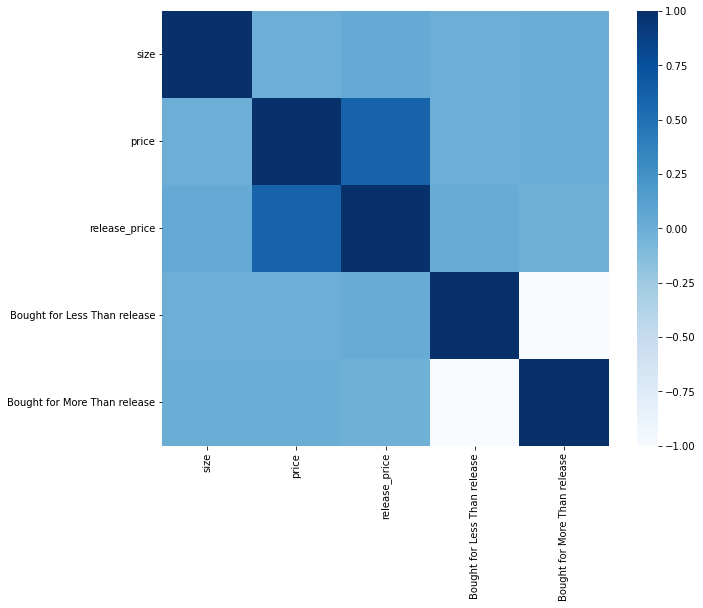

In [13]:
fig, ax = plt.subplots(figsize  = (10,8))
sns.heatmap(df_men.corr(), cmap = 'Blues')

plt.show()

In [14]:
# product (중앙값 1060 , 제품수가 많아 중앙값 이상으로 판매가 이루어진 제품으로 그래프 생성 )
df_men_product_count = pd.DataFrame(df_men['product'].value_counts().sort_values(ascending = True))
df_men_product_count = df_men_product_count[df_men_product_count['product']>= 1060]
df_men_product_count.head()

,product
Nike x NBA Dunk Low Retro EMB Nets,1350
Nike SB Dunk Low Pro Classic Green,1350
Nike Dunk Low SE Seoul (with Special Gift),1382
Nike Dunk Low Retro Hyper Cobalt,1400
Nike SB Dunk Low Pro Clear Jade,1400


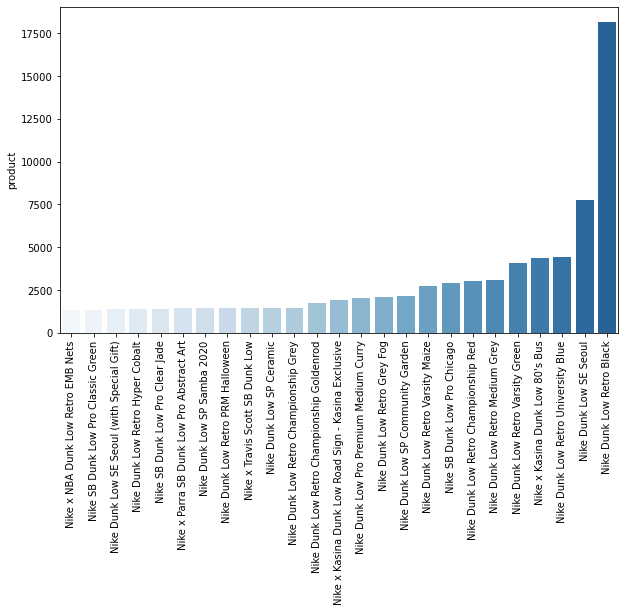

In [15]:
fig ,ax = plt.subplots(figsize = (10,6))
sns.set_palette("Blues", 30)
sns.barplot(df_men_product_count.index ,df_men_product_count['product'] ,ax = ax )
plt.xticks(rotation = 90)
plt.show()

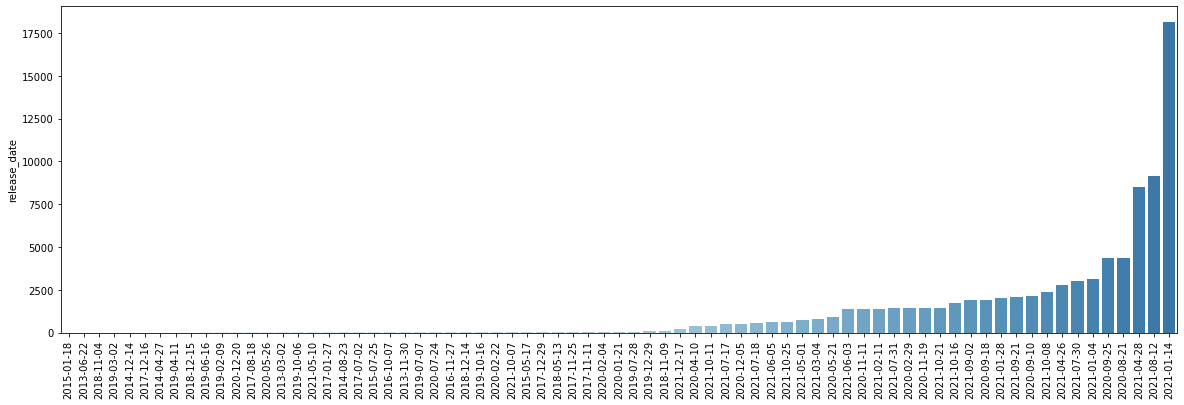

In [16]:
# release date
fig ,ax = plt.subplots(figsize = (20,6))
sns.set_palette("Blues", 100)
sns.barplot(df_men['release_date'].value_counts().sort_values(ascending = True).index, 
            df_men['release_date'].value_counts().sort_values(ascending = True))
plt.xticks(rotation = 90)
plt.show()

In [17]:
df_men_date = pd.DataFrame(df_men['date'].value_counts())
df_men_date = df_men_date[df_men_date['date'] >=300]

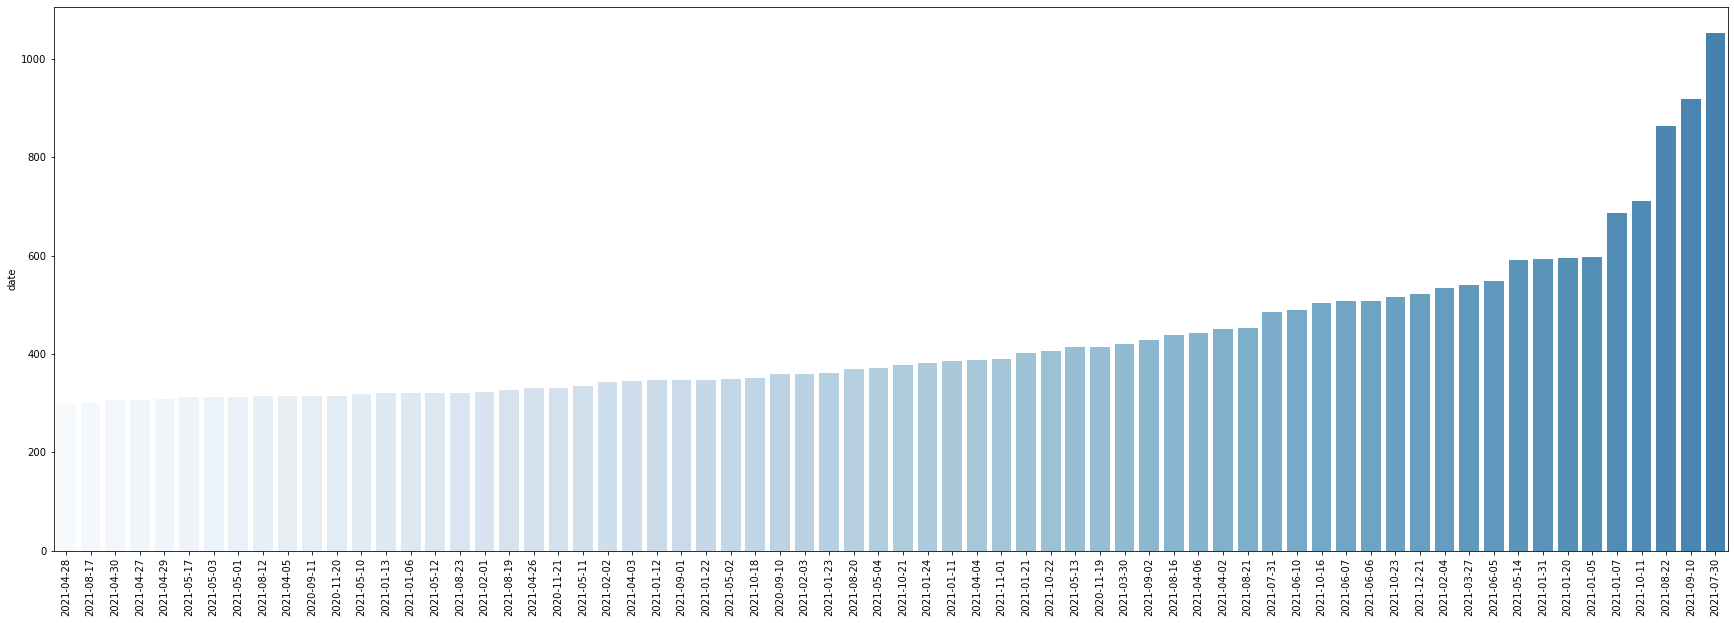

In [18]:
# 판매가 가장 많이 이루어진 날 
fig ,ax = plt.subplots(figsize = (30,10))
sns.set_palette("Blues",100)
sns.barplot(df_men_date.index, 
            df_men_date ['date'].sort_values(ascending = True))
plt.xticks(rotation = 90)
plt.show()

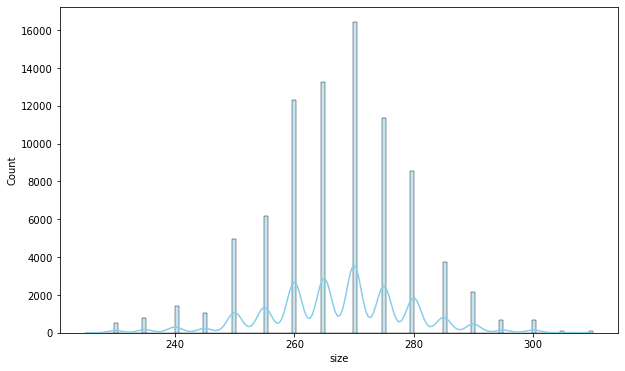

In [19]:
# size 
fig ,ax = plt.subplots(figsize = (10,6))
sns.histplot(df_men['size'], kde = True, ax = ax, color = 'skyblue')
plt.show()

In [20]:
df_men_pp = np.round(df_men.groupby('product')['price'].median(),-1).sort_values(ascending = True)

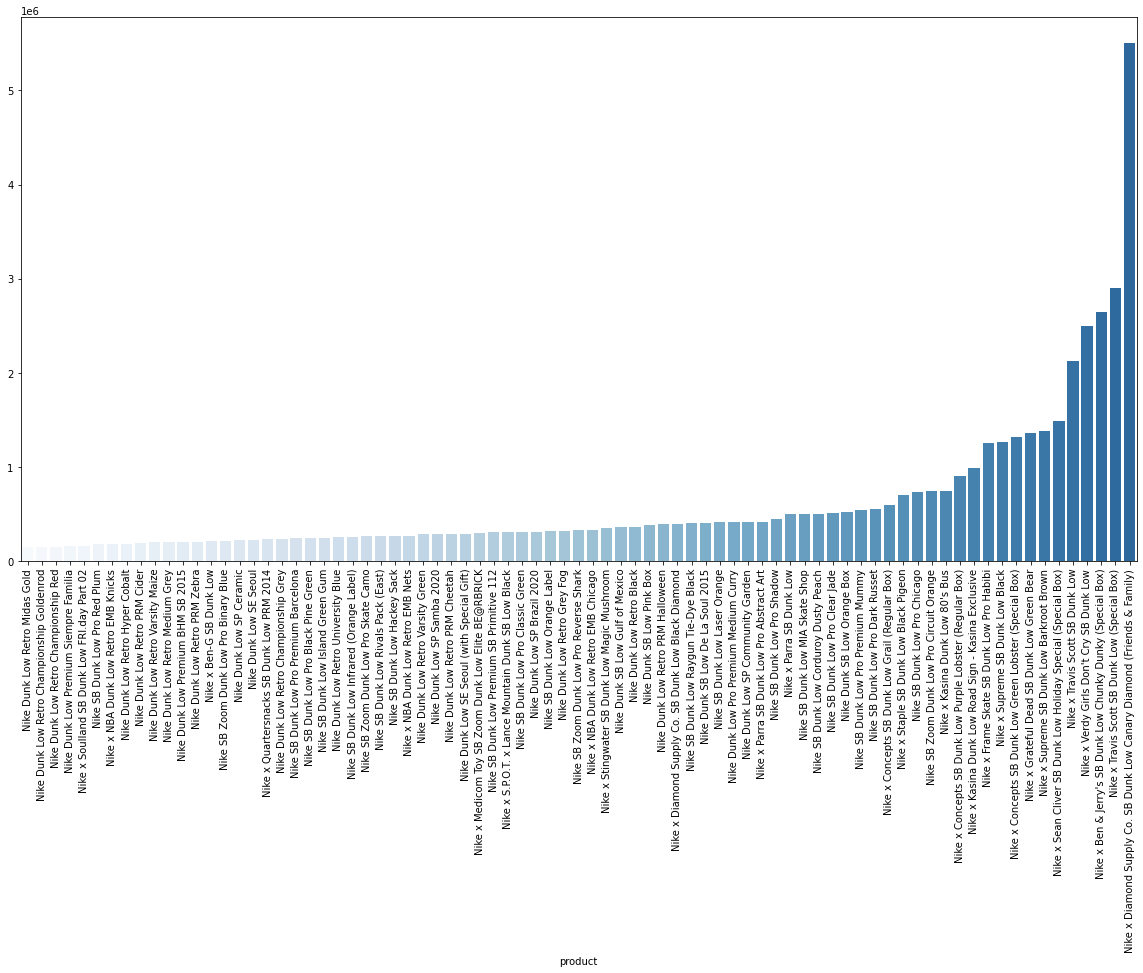

In [21]:
fig ,ax = plt.subplots(figsize = (20,10))
sns.barplot(df_men_pp.index,df_men_pp.values ,ax = ax)
plt.xticks(rotation = 90)
plt.show()

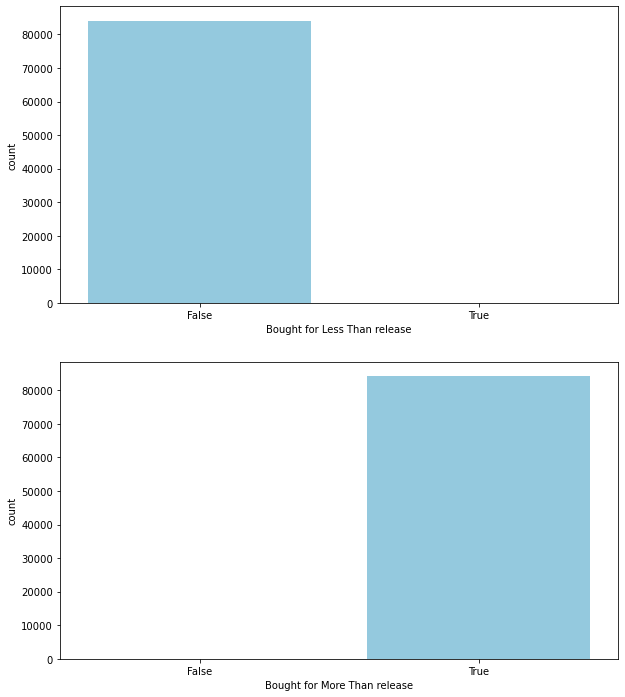

In [22]:
fig , (ax0, ax1) = plt.subplots(2,1 , figsize = (10, 12))

sns.countplot(df_men['Bought for Less Than release'],color = 'skyblue', ax = ax0)
sns.countplot(df_men['Bought for More Than release'],color = 'skyblue', ax = ax1)
plt.show()

In [23]:
# 여성
df_women = df[(df['product'].str.contains('(GS)')) |(df['product'].str.contains('(W)')) & (~df['product'].str.contains('Off-White Dunk'))]
df_women.head()

,size,price,date,product,release_date,color,release_price,Bought for Less Than release,Bought for More Than release
0,235,250000,2021-09-11,(GS) Nike Dunk Low Championship Grey,2021-09-02,WOLFGREY/DARKOBSIDIAN-TOTALORANGE,100800,False,True
1,235,250000,2021-09-12,(GS) Nike Dunk Low Championship Grey,2021-09-02,WOLFGREY/DARKOBSIDIAN-TOTALORANGE,100800,False,True
2,240,280000,2021-09-18,(GS) Nike Dunk Low Championship Grey,2021-09-02,WOLFGREY/DARKOBSIDIAN-TOTALORANGE,100800,False,True
3,235,260000,2021-09-19,(GS) Nike Dunk Low Championship Grey,2021-09-02,WOLFGREY/DARKOBSIDIAN-TOTALORANGE,100800,False,True
4,240,240000,2021-09-19,(GS) Nike Dunk Low Championship Grey,2021-09-02,WOLFGREY/DARKOBSIDIAN-TOTALORANGE,100800,False,True


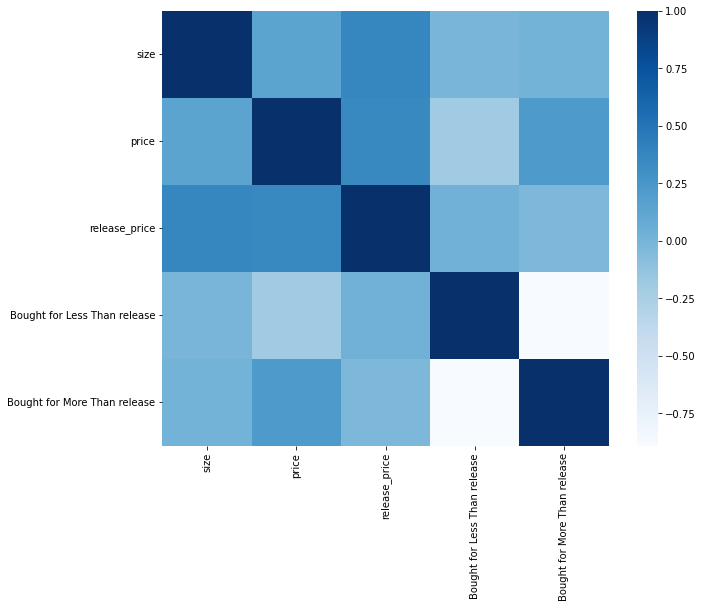

In [24]:
fig, ax = plt.subplots(figsize  = (10,8))
sns.heatmap(df_women.corr(), cmap = 'Blues')

plt.show()

In [25]:
# product 
df_women_product_count = pd.DataFrame(df_women['product'].value_counts().sort_values(ascending = True))
df_women_product_count = df_women_product_count[df_women_product_count['product']>= 1060]
df_women_product_count.head()

,product
(W) Nike Dunk Low Light Soft Pink,1162
(W) Nike Dunk Low Archeo Pink,1350
(W) Nike Dunk Low SE Candy,1417
(W) Nike Dunk Low Photon Dust,1449
(GS) Nike Dunk Low University Blue,1450


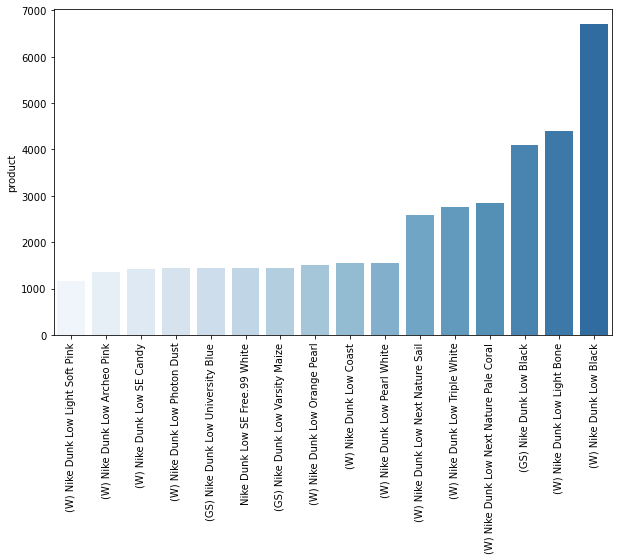

In [32]:
fig ,ax = plt.subplots(figsize = (10,6))
sns.set_palette("Blues", 20)
sns.barplot(df_women_product_count.index ,df_women_product_count['product'] ,ax = ax )
plt.xticks(rotation = 90)
plt.show()

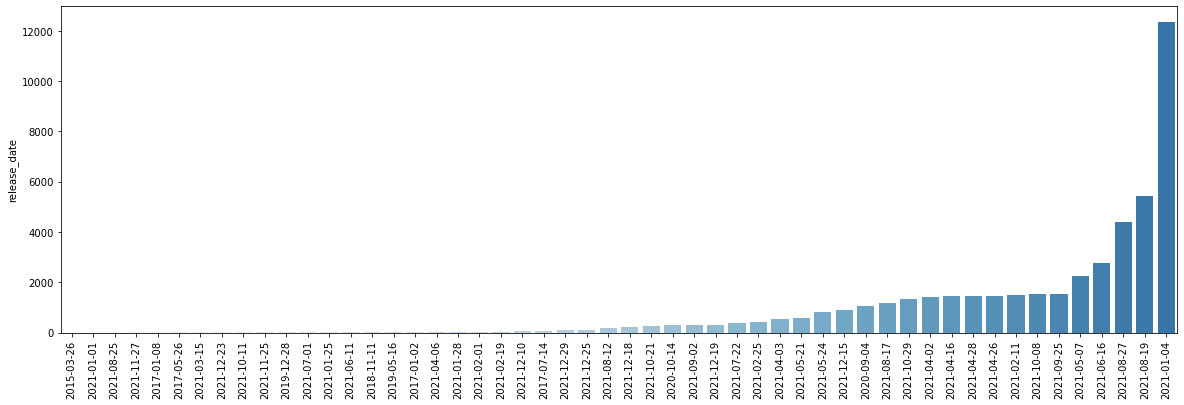

In [33]:
# release date
fig ,ax = plt.subplots(figsize = (20,6))
sns.set_palette("Blues", 70)
sns.barplot(df_women['release_date'].value_counts().sort_values(ascending = True).index, 
            df_women['release_date'].value_counts().sort_values(ascending = True))
plt.xticks(rotation = 90)
plt.show()

In [28]:
df_women_date = pd.DataFrame(df_women['date'].value_counts())
df_women_date = df_women_date[df_women_date['date'] >=300]

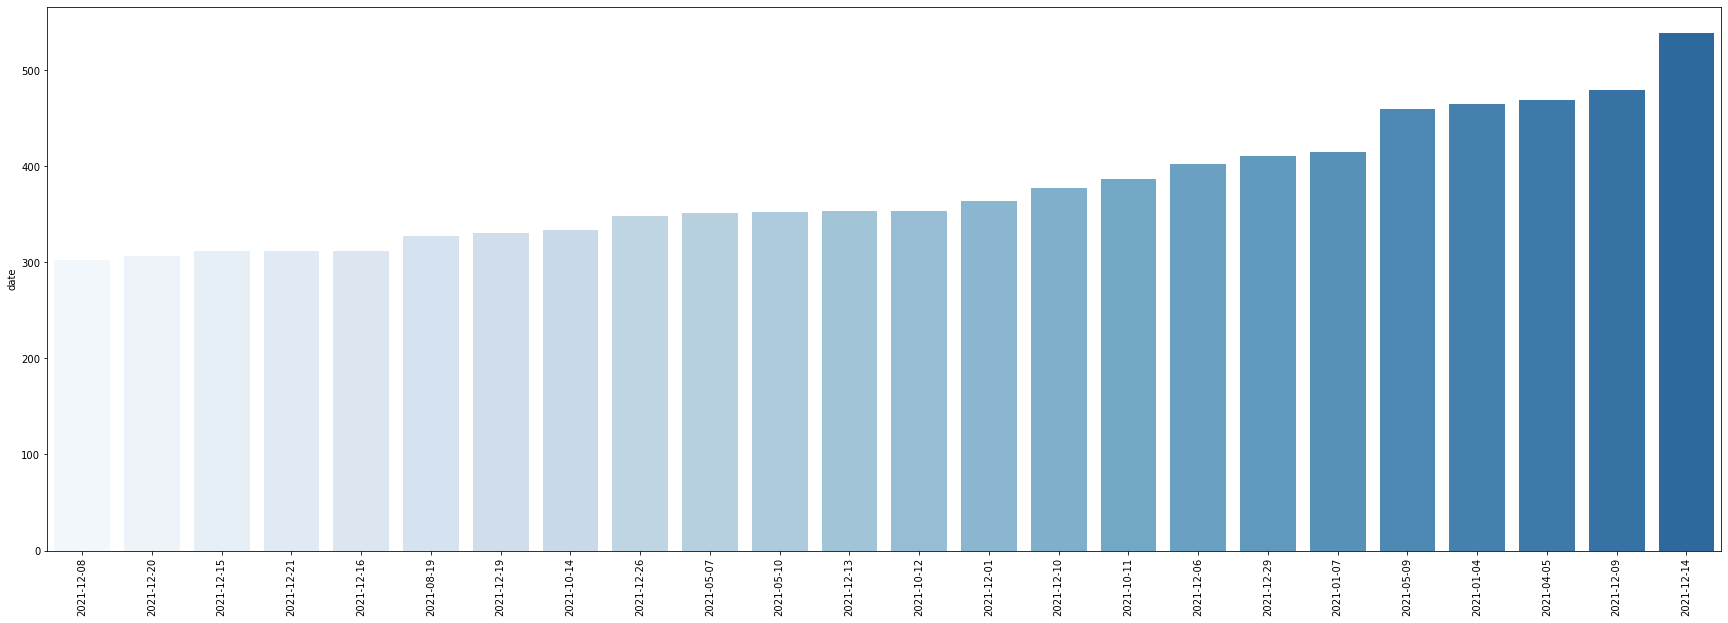

In [29]:
# 판매가 가장 많이 이루어진 날 
fig ,ax = plt.subplots(figsize = (30,10))
sns.set_palette("Blues",30)
sns.barplot(df_women_date.index, 
            df_women_date ['date'].sort_values(ascending = True))
plt.xticks(rotation = 90)
plt.show()

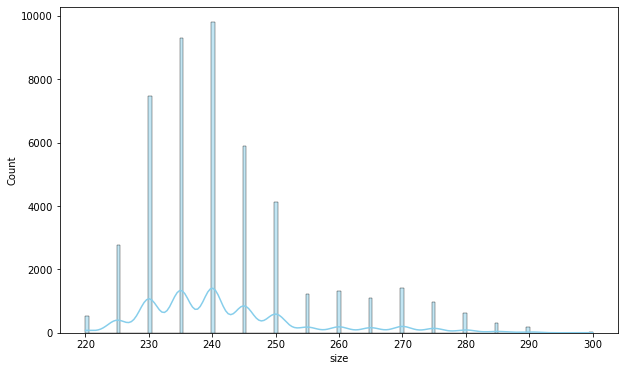

In [30]:
# size 
fig ,ax = plt.subplots(figsize = (10,6))
sns.histplot(df_women['size'], kde = True, ax = ax, color = 'skyblue')
plt.show()

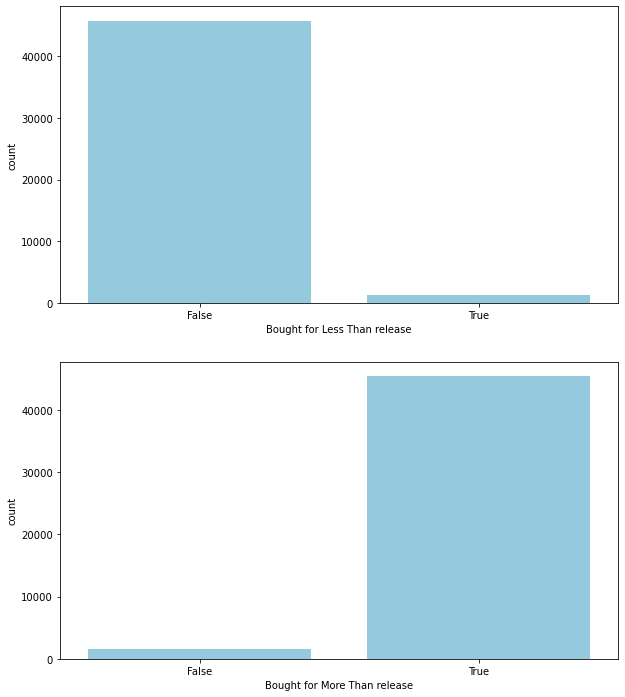

In [31]:
fig , (ax0, ax1) = plt.subplots(2,1 , figsize = (10, 12))

sns.countplot(df_women['Bought for Less Than release'],color = 'skyblue', ax = ax0)
sns.countplot(df_women['Bought for More Than release'],color = 'skyblue', ax = ax1)
plt.show()